In [45]:
import numpy as np
import matplotlib.pyplot as plt
import time
import ast


import sys
sys.path.insert(1, '../Files')

import logo
from constants import Units, Constants
from SNdistribution import SNdistribution

import plotly.graph_objects as go

In [2]:
%load_ext autoreload
%autoreload 2

Check if everything is ok

In [3]:
logo.logo()


      ____  _   _   _____          _                 _\/_
     / ___|| \ | | |  ___|_ _  ___| |_ ___  _ __ _   _/\ 
     \___ \|  \| | | |_ / _` |/ __| __/ _ \| '__| | | |
      ___) | |\  | |  _| (_| | (__| || (_) | |  | |_| |
     |____/|_| \_| |_|  \__,_|\___|\__\___/|_|   \__, |
                                                 |___/ 
                                            
                Baking particles since 1987!
                         v.beta.1
    


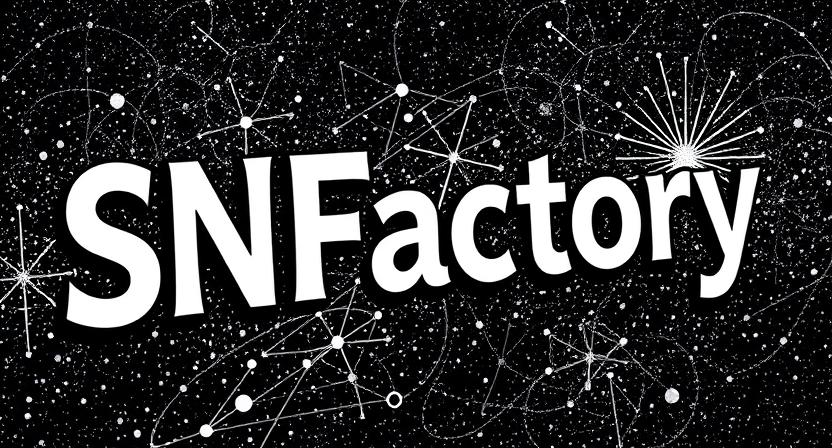

In [4]:
logo.logoIMG()

# Simulate SN in the galaxy

----------------------
Galactic SN distribution:
<img src="imgs/SNdistribution.png" alt="SNdistribution" width="250">

----------------------

For that you have class $\bf{SNdistribution}$ defined in the imported module $\bf{SNdistribution}$

Inputs:
- SNrate: galactic SN rate [number of SN events per century]
- Rd: exponential radial parameter [kpc]
- H: exponential z parameter [kpc]
- RE: r positon of the Earth wrt the Galactic Center [kpc]
- zE: z position of the Earth wrt the Galactic plane [kpc]

In [38]:
SNdist = SNdistribution(SNrate=1.63, 
                        Rd=2.6, 
                        H=0.3, 
                        RE=8.23, 
                        zE=0.0208)

## Simulate the SN history (r, theta, z, t)

##### Estimate the SN relevant time window

To compute the time (in seconds) that a particle takes to arrive at Earth use the function $\bf{tarrival(E, m, r, theta, z)}$ defined in the imported module $\bf{SNdistribution}$.

Inputs:

 - E: energy [MeV]
 - m: mass [MeV]
 - r [Kpc], theta, z[Kpc]: position of  the SN in cilindricals. Earth at (RE, 0,  zE). Galactic Center at (0, 0, 0)

Output:
 - particle travel time between SN and Earth

In [8]:
# ALPs that take longer to reach Earth: minimum energy and maximum distance
print('max time (SN at r=-30 kpc, and very slow ALPs: Ea~ma):')
print( 't = %.6e' % SNdist.tarrival(0.01*(1 + 0.01), 0.01, -30, 0, 0) , 's' ) # inputs: (Ea, ma, r, theta, z)
print( 't = %.6e' % SNdist.tarrival(1*(1 + 0.01), 1, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(10*(1 + 0.01), 10, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(100*(1 + 0.01), 100, -30, 0, 0) , 's' )

RE=8.23
zE=0.0208
# ALPs that take longer to reach Earth: minimum energy and maximum distance
print()
print('min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)')
print( 't = %.6e' % SNdist.tarrival(150, 0.01, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 1, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 10, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 100, RE + 0.1, 0, zE) , 's' )

max time (SN at r=-30 kpc, and very slow ALPs: Ea~ma):
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s

min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)
t = 1.029379e+10 s
t = 1.029402e+10 s
t = 1.031674e+10 s
t = 1.381057e+10 s


### SIMULATE

To simulate the galactic SN history use the function $\bf{SNsimulation(num\_ITER, time\_low, time\_up, rng\_num)}$ defined in the imported module $\bf{SNdistribution}$.

Inputs:
   - num_ITER: number of galactic histories that you want to simulate
   - time_low and time_up:  set the time window (in seconds) where the SN can occur
   - rng_num: seed number for the random generation (if not specified it uses the FIXED seed, i.e. always the same result)

Outputs:
   - SN_numbers: list of SN per simulated galactic history
   - SN_sim: list of arrays. Each array corresponds to a simulated galactic history, with shape (SN_numbers, 4). Those 4 are r [kpc], \theta, z [kpc], t [s], the location and time of each SN.

In [208]:
# number of universes:
num_ITER = 20

SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = -1e10)
# SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = 0, rng_num=120)


# show the number of SN per universe
iteration = np.arange(1, num_ITER + 1)

print("Iteration | SN count")
for i, count in zip(iteration, SN_numbers):
    print(f"{i:>9} | {count:>8}")

Iteration | SN count
        1 |    14366
        2 |    14349
        3 |    14344
        4 |    14466
        5 |    14475
        6 |    14357
        7 |    14411
        8 |    14555
        9 |    14443
       10 |    14321
       11 |    14297
       12 |    14494
       13 |    14620
       14 |    14541
       15 |    14503
       16 |    14552
       17 |    14223
       18 |    14489
       19 |    14285
       20 |    14460


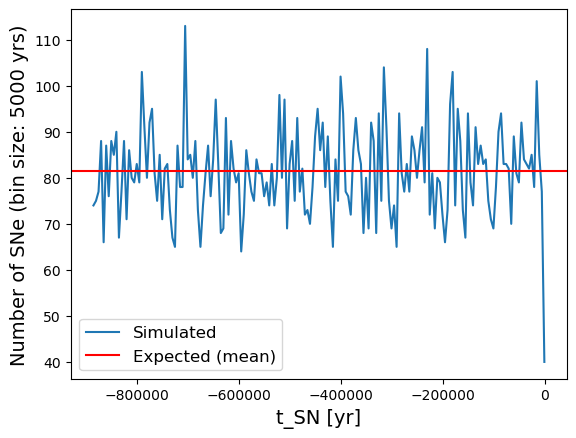

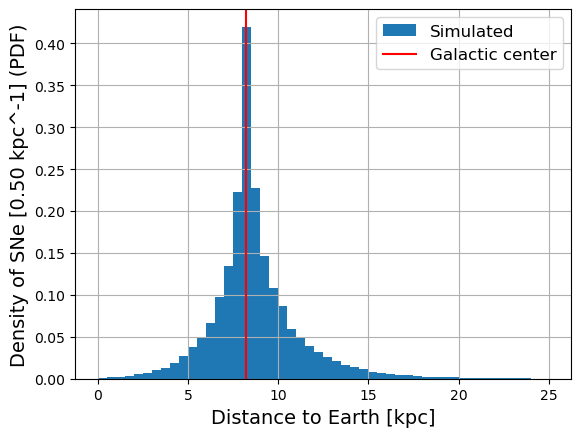

In [14]:
# Check if the time distribution is ok

sim_index = -1

SN_t_yrs = SN_sim[sim_index][:,3] / Units.seconds_in_year


t_bin = 5000 # yrs 

bin_edges = np.arange(-2.8e13 / Units.seconds_in_year,
                      -1e10  / Units.seconds_in_year + t_bin,
                      t_bin)

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])


# bin to count how many SN are in each bin
SN_per_bin, _ = np.histogram(SN_t_yrs, bins=bin_edges)

plt.plot(bin_centers, SN_per_bin, label='Simulated')
plt.axhline(y=1.63 * t_bin / 100, c='red', label='Expected (mean)')
# plt.xscale('log')
plt.xlabel('t_SN [yr]', fontsize=14)
plt.ylabel(f'Number of SNe (bin size: {t_bin:d} yrs)', fontsize=14)
plt.legend(fontsize=12)
plt.show()




# Check if the distance distribution is ok

distances = SNdist.dSNearth(SN_sim[sim_index][:,0], SN_sim[sim_index][:,1], SN_sim[sim_index][:,2])


d_bin = 0.5 #kpc

bin_edges = np.arange(0,
                      25 + d_bin,
                      d_bin)

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.hist(distances, bins=bin_edges, density=True, label='Simulated')
plt.axvline(x=8.23, c='red', label='Galactic center')
plt.xlabel('Distance to Earth [kpc]', fontsize=14)
plt.ylabel(f'Density of SNe [{d_bin:.2f} kpc^-1] (PDF)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [15]:
# To ease visualization

import pandas as pd

# Create DataFrame with a single simulation
df = pd.DataFrame(SN_sim[2], columns=['r [kpc]', '$\theta$', 'z [kpc]', 't [s]'])

# Show the first 10 rows
df.head(10)

r [kpc]  $\theta$   z [kpc]         t [s]
0  3.633596  4.739676 -0.379220 -2.799916e+13
1  0.202749  0.202460  0.079171 -2.799898e+13
2  1.251226  5.475244 -0.320001 -2.799847e+13
3  1.684112  2.802380 -0.001709 -2.799619e+13
4  5.361244  4.173745  0.447933 -2.799555e+13
5  2.562183  1.889712 -0.326796 -2.799503e+13
6  2.177280  0.077653  0.087030 -2.799428e+13
7  1.914182  5.419587  0.137702 -2.799352e+13
8  8.099642  3.558192  0.138277 -2.799329e+13
9  3.172521  1.907403 -0.527523 -2.799244e+13

#### Plot the SN in the galaxy

#### THIS IS FOR VISUALIZATION ONLY, THE STARS DO NOT FOLLOW A GALACTIC MODEL

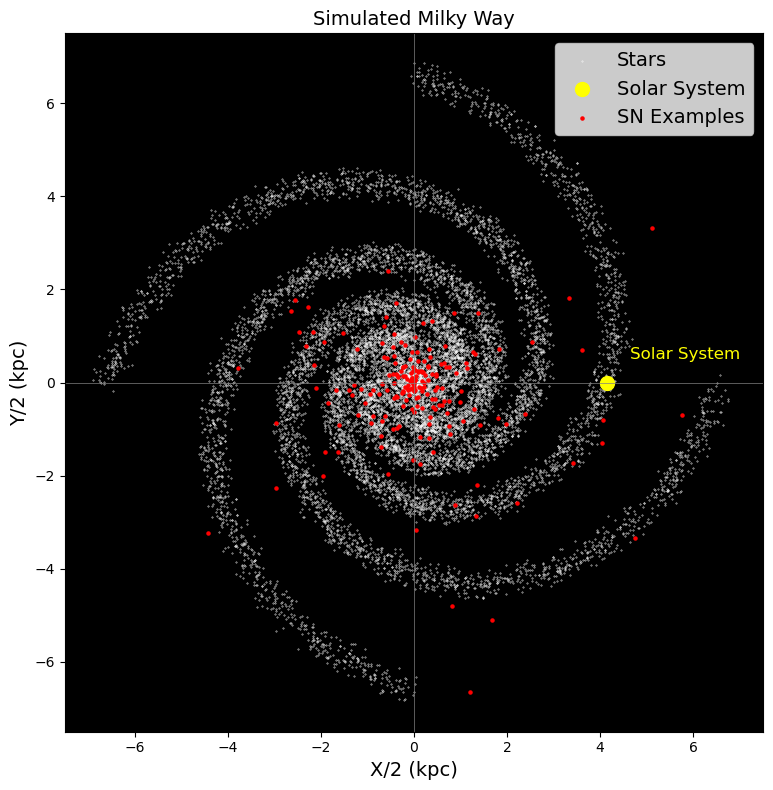

In [18]:
# Parameters
facrad = 2
num_stars = 10000  # total number of stars
num_arms = 4       # number of arms
spread = 0.2       # dispersion of stars around the arms
core_radius = 2 / facrad  # Central core radius [kpc]
disk_radius = 15 / facrad  # Galactic dist radius [kpc]
solar_system_position = np.array([8.3 / facrad, 0])  # Position of the Solar System [kpc]

# Spiral Arms
stars = []
for k in range(num_arms):
    for _ in range(num_stars // num_arms):
        theta = np.random.uniform(0, 2 * np.pi)  # angle for the spiral
        r = np.exp(0.3 * theta) + np.random.uniform(-spread, spread)  # dispersion radius
        if r <= disk_radius:  # limit the stars to the disc
            noise = np.random.uniform(-spread, spread, size=2)  # noise for randomness
            x = r * np.cos(theta + 2 * np.pi * k / num_arms) + noise[0]
            y = r * np.sin(theta + 2 * np.pi * k / num_arms) + noise[1]
            stars.append([x, y])

# Central core
core_stars = []
for _ in range(num_stars // 5):
    r = np.random.uniform(0, core_radius)  # radius
    theta = np.random.uniform(0, 2 * np.pi)  # angle
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    core_stars.append([x, y])

# Combine arms and core
all_stars = np.vstack([stars, core_stars])

# SN examples (using events from the 1st simulation)
num_sn_examples = 200
SN_examples_X = [ SN_sim[0][ev][0] * np.cos(SN_sim[0][ev][1]) / facrad for ev in range(num_sn_examples)]
SN_examples_Y = [ SN_sim[0][ev][0] * np.sin(SN_sim[0][ev][1]) / facrad for ev in range(num_sn_examples)]
    

# Plot Milky Way-like galaxy
plt.figure(figsize=(8, 8))
plt.scatter(all_stars[:, 0], all_stars[:, 1], s=0.1, color='white', label="Stars")
plt.scatter(*solar_system_position, s=100, color='yellow', label="Solar System")
plt.text(solar_system_position[0] + 0.5, solar_system_position[1] + 0.5, 
         "Solar System", color='yellow', fontsize=12)
plt.scatter(SN_examples_X, SN_examples_Y, s=5, color='red', label="SN Examples")
plt.gca().set_facecolor('black')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlim(-disk_radius, disk_radius)
plt.ylim(-disk_radius, disk_radius)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(fontsize=14)
plt.title("Simulated Milky Way", fontsize=14)
plt.xlabel("X/2 (kpc)", fontsize=14)
plt.ylabel("Y/2 (kpc)", fontsize=14)
plt.tight_layout()
# plt.savefig("tutorial_results/galaxy2D.pdf", bbox_inches='tight')
plt.show()


#### THIS IS FOR VISUALIZATION ONLY, THE STARS DO NOT FOLLOW A GALACTIC MODEL

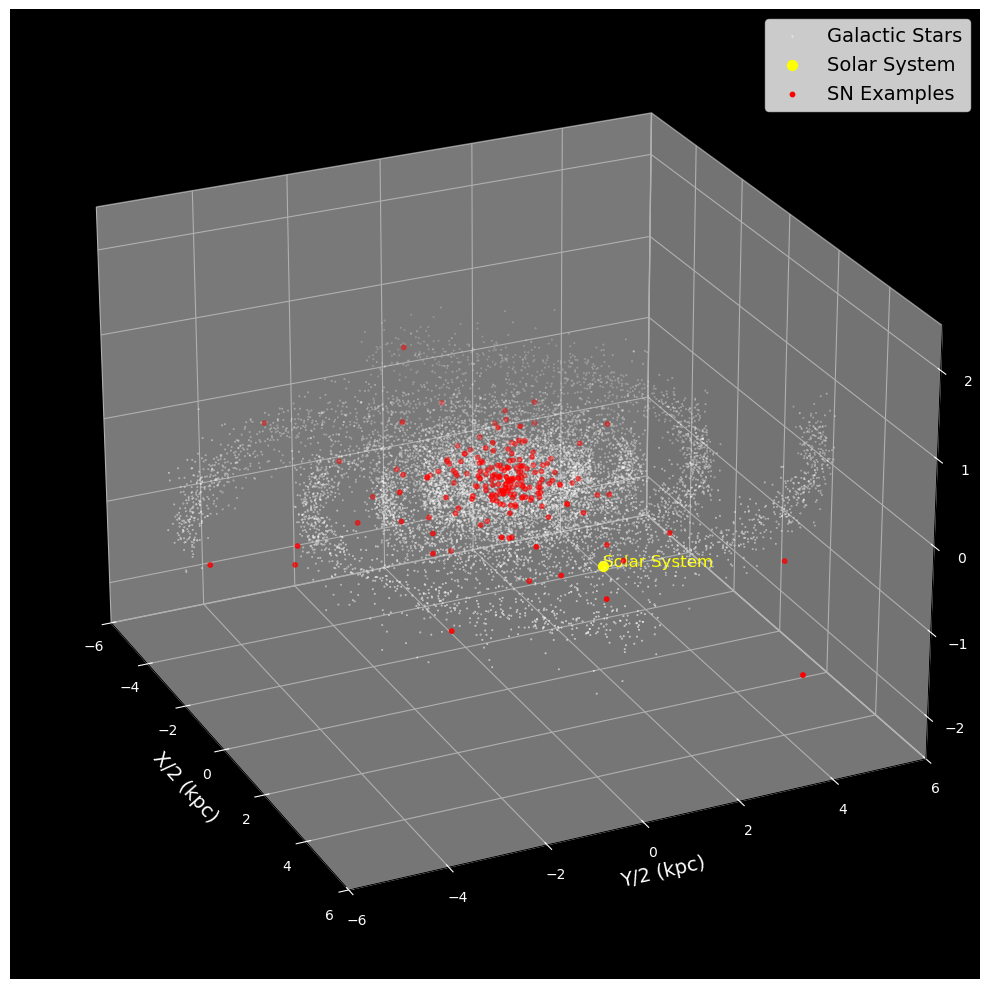

In [16]:
# Parameters
facrad = 2  # Scaling factor
num_stars = 10000  # Total number of stars
num_arms = 4  # Number of spiral arms
spread = 0.2  # Dispersion of stars around spiral arms
core_radius = 2 / facrad  # Central core radius, in kpc
scale_height = 0.3 / facrad  # Scale height for z, in kpc
disk_radius = 15 / facrad  # Galactic disk radius, in kpc
solar_system_position = [8.3 / facrad, 0, 0]  # Solar System position, in kpc

# Generate spiral arms
stars = []
for k in range(num_arms):
    for _ in range(num_stars // num_arms):
        theta = np.random.uniform(0, 2 * np.pi)  # Angle for the spiral
        r = min(np.exp(0.3 * theta), disk_radius) + np.random.uniform(-spread, spread)  # Radius with dispersion
        noise = np.random.uniform(-spread, spread, size=2)  # Noise for dispersion
        z = np.random.exponential(scale_height) * np.random.choice([-1, 1])  # Height with random sign
        x = r * np.cos(theta + 2 * np.pi * k / num_arms) + noise[0]
        y = r * np.sin(theta + 2 * np.pi * k / num_arms) + noise[1]
        stars.append([x, y, z])

# Generate core stars
core_stars = []
for _ in range(num_stars // 10):
    r = np.random.uniform(0, core_radius)  # Random radius for the core
    theta = np.random.uniform(0, 2 * np.pi)  # Random angle
    z = np.random.exponential(scale_height) * np.random.choice([-1, 1])  # Height with random sign
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    core_stars.append([x, y, z])

# Combine all stars
all_stars = np.array(stars + core_stars)

# Generate SN examples from the first simulation iteration
num_sn_examples = 200
SN_examples_X = [ SN_sim[0][ev][0] * np.cos(SN_sim[0][ev][1]) / facrad for ev in range(num_sn_examples)]
SN_examples_Y = [ SN_sim[0][ev][0] * np.sin(SN_sim[0][ev][1]) / facrad for ev in range(num_sn_examples)]
SN_examples_Z = [ SN_sim[0][ev][2] / facrad for ev in range(num_sn_examples)]

# Plot the Milky Way in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d', facecolor='black')

# Plot all stars
ax.scatter(all_stars[:, 0], all_stars[:, 1], all_stars[:, 2], c='white', s=0.1, label='Galactic Stars')

# Plot the Solar System
ax.scatter(*solar_system_position, c='yellow', s=50, label='Solar System')
ax.text(*solar_system_position, 'Solar System', color='yellow', fontsize=12)

# Plot SN examples
ax.scatter(SN_examples_X, SN_examples_Y, SN_examples_Z, c='red', s=10, label='SN Examples')

# Customize axes
ax.set_xlim(-disk_radius*0.8, disk_radius*0.8)
ax.set_ylim(-disk_radius*0.8, disk_radius*0.8)
ax.set_zlim(-2.5 , 2.5)
ax.set_xlabel('X/2 (kpc)', color='white', fontsize=14)
ax.set_ylabel('Y/2 (kpc)', color='white', fontsize=14)
ax.set_zlabel('Z/2 (kpc)', color='white', fontsize=14)
ax.tick_params(colors='white')
ax.legend(loc='upper right', fontsize=14)

# angle of visualization
ax.view_init(elev=25, azim=-25)
plt.tight_layout()
# plt.savefig("tutorial_results/galaxy3D.pdf", bbox_inches='tight')
plt.show()




#### Distribution in galactic coordinates (consistent)

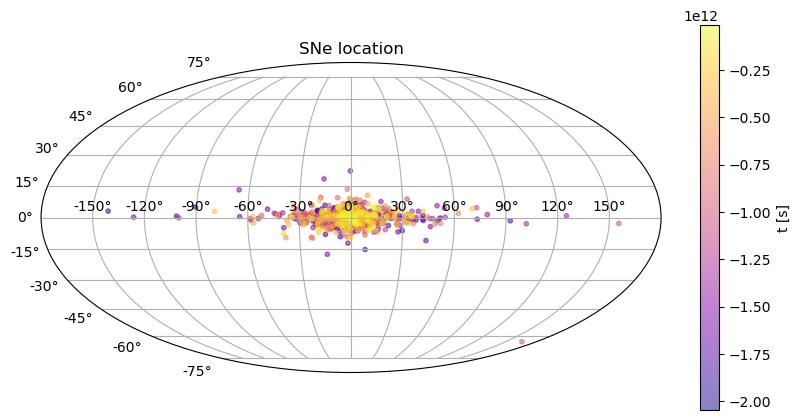

In [209]:
solar_system_position = np.array([8.3 , 0, 0])  # Position of the Solar System [kpc]


# number off SN to plot
num_sn_examples = 1000

# take SN positions from df (r, theta, z) 'r [kpc]', '$\theta$', 'z [kpc]', 't [s]'
r = df['r [kpc]'].values[-num_sn_examples:]
theta = df['$\theta$'].values[-num_sn_examples:]
z = df['z [kpc]'].values[-num_sn_examples:]

# Catesian
x = r * np.cos(theta)
y = r * np.sin(theta)

# Center in the Sun
x_helio = x - (solar_system_position[0] * np.cos(solar_system_position[1]) )
y_helio = y - (solar_system_position[0] * np.sin(solar_system_position[1]) )
z_helio = z - solar_system_position[2]

# now the GC is in (x_helio, y_helio) = (-r_sun, 0)
# I want it in (r_sun, 0)

# Mirror
x_new = -x_helio
y_new = y_helio
z_new = z_helio

# Galactic coordinates
l = np.arctan2(y_new, x_new)      # longitude [-pi, pi]
b = np.arctan2(z_new, np.sqrt(x_new**2 + y_new**2))  # latitude



# Plot in Mollweide projection (galactic coordinates)
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")
sc = ax.scatter(l, b, s=10, c=df['t [s]'][-num_sn_examples:], cmap='plasma', alpha=0.5)


# Colorbar for SN times
cbar = plt.colorbar(sc, orientation="vertical", pad=0.05)
cbar.set_label("t [s]")

ax.set_title("SNe location")
ax.grid(True)
# plt.savefig("tutorial_results/SNlocation.pdf", bbox_inches='tight')
plt.show()

## Diffuse approximation


Diffuse flux:

<img src="imgs/flux-factor.png" alt="flux-factor" width="600">

with $\frac{dN_a}{dE_a^{Earth}}$ the ALP spectrum at Earth of a single SN.

D. Alonso-González, D. Cerdeño, M. Cermeño and A.D. Perez, Probing a diffuse flux of axion-like particles from galactic supernovae with neutrino water Cherenkov detectors, Phys.Rev.D 111 (2025) 8, 083019, Phys.Rev.D 112 (2025) 2, 029901 (erratum) [2412.09595]

---------------

Use the function $\bf{flux\_factor}$

In [33]:
# FLUX

diffSNfactor = SNdist.flux_factor()
print("diffuse galactic SN flux factor: ", diffSNfactor, " [cm^{-2} s^{-1}]")

diffuse galactic SN flux factor:  1.3955222568980171e-55  [cm^{-2} s^{-1}]


In [34]:
# FLUENCE

ExpTIME = 20 * Units.seconds_in_year  # Time window of the experiment, in seconds

fluence_diff = diffSNfactor * ExpTIME # [cm^{-2}]
print(f'Diffuse fluence factor (for 20 yr exposure): {fluence_diff:.3e} cm^-2')

Diffuse fluence factor (for 20 yr exposure): 8.802e-47 cm^-2


## Stochastic fluence

#### Compute the flux from 1 simulation

Use the function $\bf{Eflux1sim(ma, texposure, SN\_sim\_it)}$ defined in the imported module $\bf{SNdistribution}$ to compute the SN-Earth distance [kpc], and the energy [MeV] and of the particles that would reach Earth for EACH SN in 1 SIMULATION 

Inputs:

  -  ma: mass of the particle [MeV]
  -  texposure: exposure time [s]
  -  SN_sim_it: array with (# SN in this simulation, [rSN, thetaSN, zSN, tSN]) (output of the funtion above)

Output: np.array with 3 entries

  - E1: energy of the particles that reach Earth at the end of the exposure time (lower) [MeV]
  - E2: energy of the particles that reach Earth at the beginning of the experiment (higher) [MeV]
  - dSN: SN-Earth distance [kpc]

In [210]:
# Example for 1 iteration

iit = 0 # choose a specific interaction
maTEST = 30 # MeV



# Generate Erange for the selected iteration
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[iit])



# Create DataFrame with a single simulation
Erange_df = pd.DataFrame(Erange, columns=['E1 [MeV]', 'E2 [MeV]', 'd(SN-Earth) [kpc]'])

# Show the first and the last 5 rows
pd.concat([Erange_df.head(5), Erange_df.tail(5)])

E1 [MeV]   E2 [MeV]  d(SN-Earth) [kpc]
0      30.009724  30.009725           6.924251
1      30.016850  30.016851           9.111799
2      30.014410  30.014411           8.426272
3      30.010482  30.010482           7.186689
4      30.028976  30.028977          11.940593
14361        NaN        NaN           9.002593
14362        NaN        NaN          11.658623
14363        NaN        NaN           7.463817
14364        NaN        NaN          11.072778
14365        NaN        NaN           7.769522

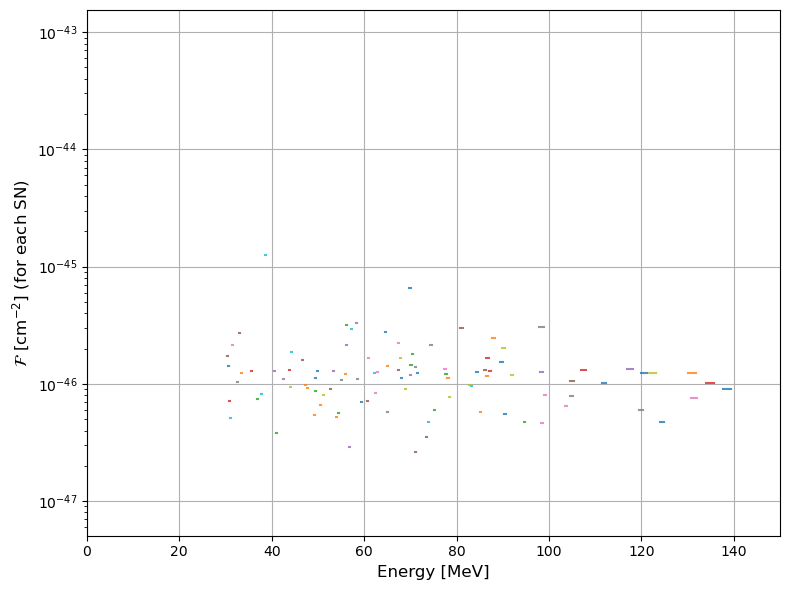

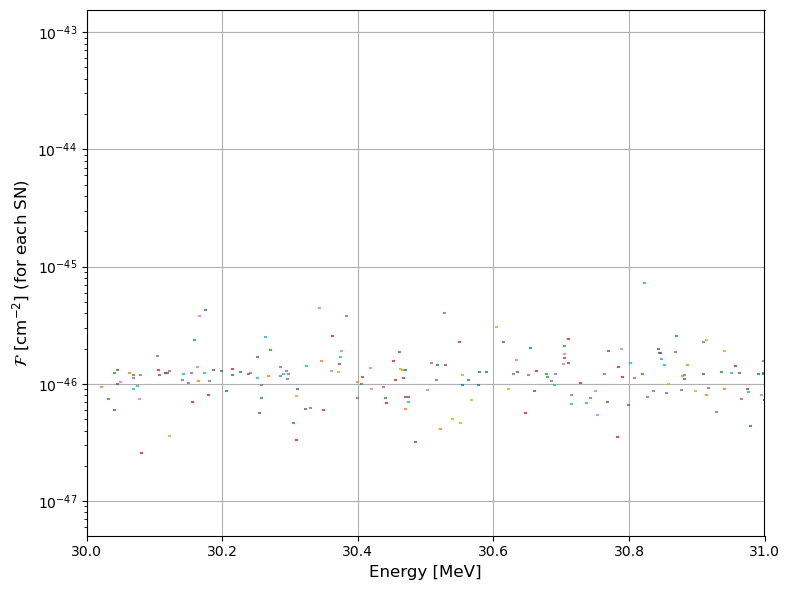

In [211]:
########
# PLOT #
# Example for 1 iteration and a fixed Mass #
########


# plot the contribution of each SN
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([0,150])
# plt.xlim([0,40])
plt.yscale('log')
plt.xlabel("Energy [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# zoom
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([maTEST,maTEST+1])
plt.yscale('log')
plt.xlabel("Energy [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Bin the fluence

Use the function $\bf{factor1simBINS(Erange, Ebins)}$ defined in the imported module $\bf{SNdistribution}$ to compute the BINNED fluence factor considering the contributions of EVERY SN in 1 particular SIMULATION

Inputs:

  -  Erange: output of the function above: (E1, E2, dSN) --> E1 (E2): energy of the particles that reach Earth at the end (beginning) of the exposure time (lower) [MeV], dSN: SN-Earth distance [kpc]
  -  Ebins: bins of energy that you want [MeV]

Output: np.array with 3 entries

  - result_bins: fluence per bin 
  - SN_num_bins: number of SN contributing in each bin
  - SN_indices_bins: index of the SN contributing in each bin

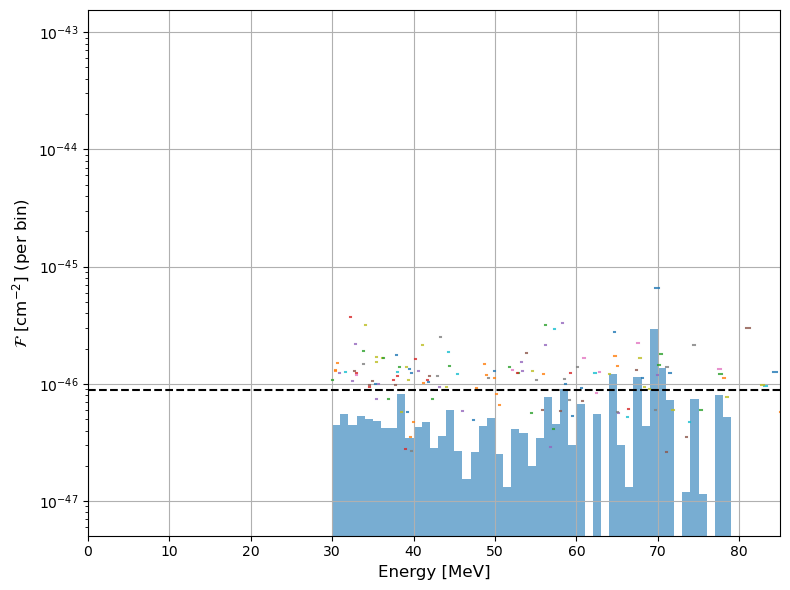

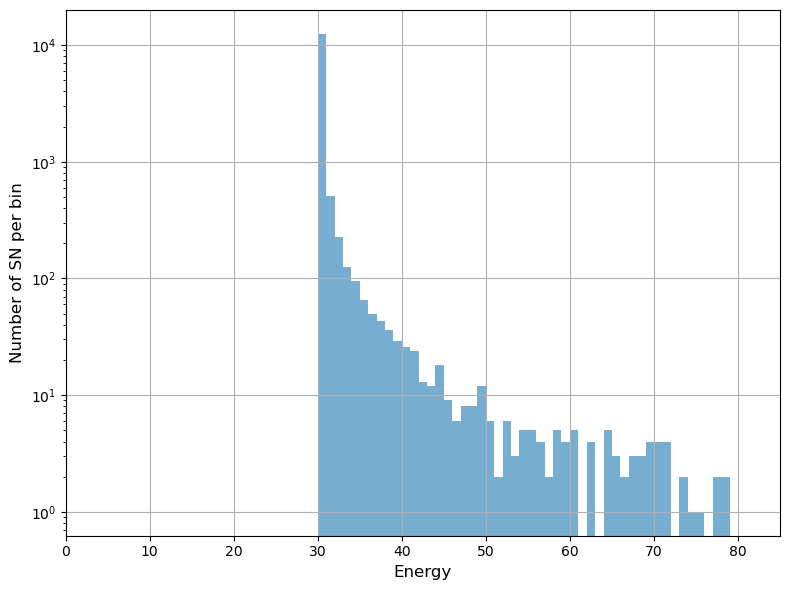

In [212]:
# plot the factor per bin (integrating each SN contribution)
# Ebins = np.linspace(15, 80, 66)
binwidth = 1
Ebins = np.arange(0, 80, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins, SN_num_bins, SN_indices_bins = SNdist.factor1simBINS(Erange, Ebins)

plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)
        
plt.bar(bin_centers, result_bins, width=np.diff(Ebins), align='center', alpha=0.6)
plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Approximation")

plt.xlim([0,85])
plt.yscale('log')
plt.xlabel("Energy [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$] (per bin)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# number of SN per bin (each SN can contribute to more than 1 bin)
plt.figure(figsize=(8, 6))

plt.bar(bin_centers, SN_num_bins, width=np.diff(Ebins), align='center', alpha=0.6)

plt.xlim([0,85])
plt.yscale('log')
plt.xlabel("Energy", fontsize=12)
plt.ylabel("Number of SN per bin", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [213]:
individual_SNe = 0

for E1, E2, dSN in Erange:
    Eoverlap_min = max(E1, 15)
    Eoverlap_max = min(E2, 80)

    if Eoverlap_min < Eoverlap_max:
        individual_SNe += 1
        

print('Sum_bin [number of SN that contribute to each bin]: ', sum(SN_num_bins))
print('Number of INDIVIDUAL SN that contribute in the entire range: ', individual_SNe)
print('\n then', sum(SN_num_bins) - individual_SNe, 'SN contribute to more than 1 bin')

Sum_bin [number of SN that contribute to each bin]:  13864
Number of INDIVIDUAL SN that contribute in the entire range:  13851

 then 13 SN contribute to more than 1 bin


In [214]:
# MORE VISUALIZATION #

# Save (r, theta, z, t) for those events, considering the saved indices:
SN_info_bins = []

for indices in SN_indices_bins:
    events = [SN_sim[iit][i] for i in indices]
    SN_info_bins.append(events)
    

# PLOT

# text
hover_text = []
for contrib in SN_info_bins:
    if contrib:
        text = "<br>".join([
            f"dSN-E={SNdist.dSNearth(r, theta, z):.2f} kpc, r={r:.2f} kpc, θ={theta:.2f}, z={z:.2f} kpc, t={t:.2e} s ={t/Units.seconds_in_year:.2e} yrs" 
            for r, theta, z, t in contrib
        ])
    else:
        text = "No SN"
    hover_text.append(text)
    
    
fig = go.Figure()

# Main plot and color bar
fig.add_trace(go.Scatter(
    x=bin_centers, 
    y=result_bins,
    mode='lines+markers',
    marker=dict(color=np.log10(SN_num_bins), colorscale='Viridis', size=8, 
                colorbar=dict(title="log10(# SN)"), showscale=True),
    text=hover_text,
    hoverinfo='text',
    name="factor(Ea)"
))

# Layout
fig.update_layout(
    title="factor(Ea) with the number of SNe that contribute and their location",
    xaxis_title="Ea [MeV]",
    yaxis_title=r"factor [cm⁻²]",
    yaxis_type="log",
    coloraxis_colorbar=dict(title="N eventos"),
    template="plotly_white"
)

fig.show()


/tmp/ipykernel_7375/1423072236.py:33: RuntimeWarning:

divide by zero encountered in log10



In [215]:
# THE DATA:

rows = []

# list of events
for Ea_center, event_list in zip(bin_centers, SN_info_bins):
    N_events = len(event_list)
    
    for event_array in event_list:
        r, theta, z, t = event_array
        dSNE = SNdist.dSNearth(r, theta, z)
        
        dt_pack = SNdist.tpackage(max(15, maTEST*1.01), max(80, maTEST*1.05), maTEST, r, theta, z)
        
        Erange_aux = SNdist.Eflux1sim(maTEST, ExpTIME, [[r, theta, z, t]])
        Eamax = Erange_aux[0][0]
        Eamin = Erange_aux[0][1]
        
        rows.append([Ea_center, N_events, dSNE, r, theta, z, t, dt_pack, Eamax, Eamin])

# Columns
columns = ['Ea [MeV]', '# SN', 
           'd_SN-Earth [kpc]', 'r [kpc]', 'theta', 'z [kpc]', 
           't [s]', 'dt_package [s]', 'Ea(t_0) [MeV]', 'Ea(t_0+t_exposure) [MeV]']

# DataFrame
SN_info_bins_df = pd.DataFrame(rows, columns=columns)
SN_info_bins_df

Ea [MeV]   # SN  d_SN-Earth [kpc]    r [kpc]     theta   z [kpc]  \
0          30.5  12460          6.924251  12.194569  0.574247 -0.157763   
1          30.5  12460          9.111799   1.088253  3.813196  0.312751   
2          30.5  12460          8.426272   1.328723  1.634305 -0.319214   
3          30.5  12460          7.186689   3.439291  1.053598 -0.258223   
4          30.5  12460         11.940593   3.781201  3.380439 -0.254248   
...         ...    ...               ...        ...       ...       ...   
13859      75.5      1         11.772105   4.189048  3.829704  0.220521   
13860      77.5      2          8.281249   0.080504  0.100390 -1.448256   
13861      77.5      2          7.863151   0.954175  0.940287  1.584510   
13862      78.5      2         10.432078   2.397742  2.669234 -0.427596   
13863      78.5      2          8.651834   0.932472  1.989961 -0.050111   

              t [s]  dt_package [s]  Ea(t_0) [MeV]  Ea(t_0+t_exposure) [MeV]  
0     -2.799986e+13    4.308874e+12      30.009724                 30.009725  
1     -2.799587e+13    5.670158e+12      30.016850                 30.016851  
2     -2.799418e+13    5.243563e+12      30.014410                 30.014411  
3     -2.799243e+13    4.472186e+12      30.010482                 30.010482  
4     -2.798559e+13    7.430480e+12      30.028976                 30.028977  
...             ...             ...            ...                       ...  
13859 -1.320888e+12    7.325632e+12      75.196943                 75.387398  
13860 -9.238003e+11    5.153317e+12      77.547852                 77.850546  
13861 -8.774569e+11    4.893139e+12      77.383477                 77.699993  
13862 -1.161854e+12    6.491751e+12      78.334236                 78.582891  
13863 -9.641778e+11    5.383927e+12      78.004500                 78.300224  

[13864 rows x 10 columns]

In [216]:
# IF WE WANT TO GET THE INFO OF SOME BIN

bin_center_value = 50.5 # MeV

SN_info_bins_df[np.isclose(SN_info_bins_df['Ea [MeV]'], bin_center_value)]


Ea [MeV]  # SN  d_SN-Earth [kpc]   r [kpc]     theta   z [kpc]  \
13777      50.5     6         11.653887  3.659687  2.707266 -0.182518   
13778      50.5     6         11.644137  4.424370  2.293742 -0.290898   
13779      50.5     6         11.272439  3.026493  3.067728  0.724416   
13780      50.5     6         10.133663  2.620132  2.277847  0.299767   
13781      50.5     6          8.274722  0.806191  1.540842  0.717661   
13782      50.5     6          8.004952  0.323419  5.517174 -0.259018   

              t [s]  dt_package [s]  Ea(t_0) [MeV]  Ea(t_0+t_exposure) [MeV]  
13777 -1.498665e+12    7.252067e+12      50.014073                 50.051576  
13778 -1.495465e+12    7.245999e+12      50.130308                 50.168253  
13779 -1.441329e+12    7.014696e+12      50.533415                 50.574103  
13780 -1.300924e+12    6.306051e+12      50.162596                 50.206339  
13781 -1.054830e+12    5.149255e+12      50.802802                 50.859649  
13782 -1.026980e+12    4.981381e+12      50.209636                 50.265285

### Mean of all simulations

To compute the mean flux factor considering all simulations, use the function $\bf{factorALLsimBINS}$ or $\bf{factorALLsimBINS\_percentile}$ defined in the imported module $\bf{SNdistribution}$.

Inputs:

 - ma: particle mass [MeV]
 - texposure: time of experiment [s]
 - SN_sim: simulation list (each simulation has a lot of SNe)
 - Ebins: energy bins [MeV]

Outputs:
 - mean or median of all simulations [cm^-2]
 - standar deviation or 16-84 percentiles [cm^-2]
 - all_bin_results, shape: (Nsim, Nbines), the flux factor for each one of the simulations (raw result that the mean/median uses)

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Tutorials/../Files/SNdistribution.py:115: RuntimeWarning:

invalid value encountered in sqrt



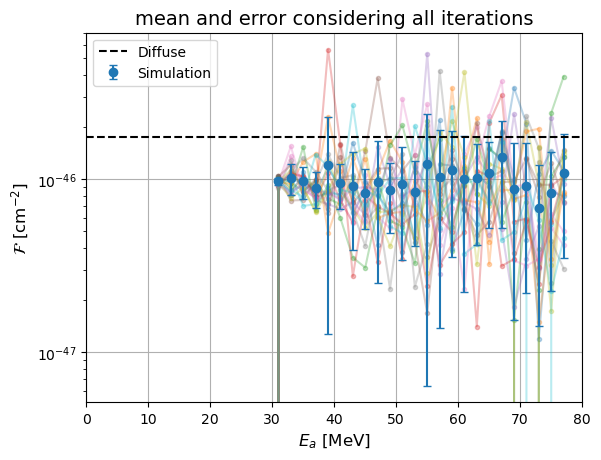

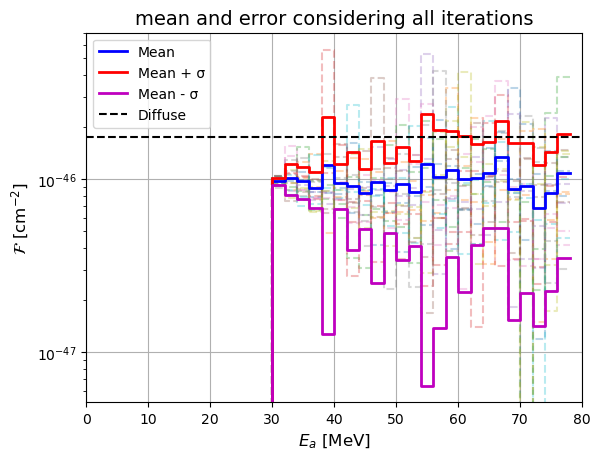

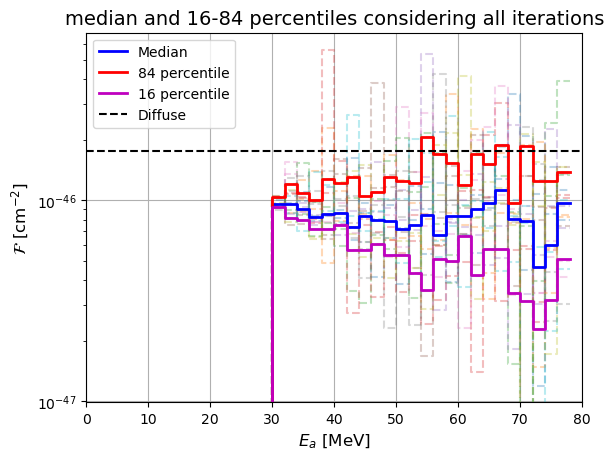

In [217]:

binwidth = 2
Ebins = np.arange(0, 78 + binwidth, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

mean_flux, std_flux, all_flux = SNdist.factorALLsimBINS(maTEST, ExpTIME, SN_sim, Ebins)



# plot each simulation
for sim in range(len(all_flux)):
    plt.plot(bin_centers, all_flux[sim], '.-', alpha=0.3)

# plot mean
plt.errorbar(bin_centers, mean_flux, yerr=std_flux, fmt='o', capsize=3, label = 'Simulation')
plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("mean and error considering all iterations", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()




# TO PLOT AS BINNED DATA

Ebins_edges = np.repeat(Ebins, 2)[1:-1]

# plot each simulation
for sim in range(len(all_flux)):
    all_flux_sim_edges = np.repeat(all_flux[sim], 2)
    plt.plot(Ebins_edges, all_flux_sim_edges, '--', alpha=0.3)

    
# plot mean
means_int_edges = np.repeat(mean_flux, 2)
std_devs_int_edges = np.repeat(std_flux, 2)

plt.plot(Ebins_edges, means_int_edges, 'b-', linewidth=2, label="Mean")
plt.plot(Ebins_edges, means_int_edges + std_devs_int_edges, 'r-', linewidth=2, label="Mean + σ")
plt.plot(Ebins_edges, means_int_edges - std_devs_int_edges, 'm-', linewidth=2, label="Mean - σ")

plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("mean and error considering all iterations", fontsize=14)
plt.legend()
plt.grid()
plt.show()



# with percentiles

binwidth = 2
Ebins = np.arange(0, 78 + binwidth, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])
Ebins_edges = np.repeat(Ebins, 2)[1:-1]


median_flux, p16_flux, p84_flux, all_flux = SNdist.factorALLsimBINS_percentile(maTEST, ExpTIME, SN_sim, Ebins)


# plot each simulation
for sim in range(len(all_flux)):
    all_flux_sim_edges = np.repeat(all_flux[sim], 2)
    plt.plot(Ebins_edges, all_flux_sim_edges, '--', alpha=0.3)


# plot mean
medians_int_edges = np.repeat(median_flux, 2)
p16_int_edges = np.repeat(p16_flux, 2)
p84_int_edges = np.repeat(p84_flux, 2)

plt.plot(Ebins_edges, medians_int_edges, 'b-', linewidth=2, label="Median")
plt.plot(Ebins_edges, p84_int_edges, 'r-', linewidth=2, label="84 percentile")
plt.plot(Ebins_edges, p16_int_edges, 'm-', linewidth=2, label="16 percentile")

plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("median and 16-84 percentiles considering all iterations", fontsize=14)
plt.legend()
plt.grid()
plt.show()